The purpose of this notebook is to complete all questions assigned for the first homework assignment in Stellar Astrophysics. I will first rewrite the questions and then provide the coded solution.


Question 1: The planet Venus is only $d_{⊕} = 0.28 AU$ from the Earth at closest
approach and can reach a maximum distance of $d_{⊕} = 1.72 AU$ when it is on
the opposite side of the Sun. This planet has a physical radius of Venus is
$R_{♀} ≈ 6.1 × 10^8cm$.

(a) Using Python, create an array of distances between Earth and Venus
from their closest physical separation to their largest with step sizes of
$∆d_{step} = 0.1 AU$. Determine the solid angle that Venus subtends on the
sky at each of these distances. Create a plot of solid angle (y-axis) vs.
Earth–Venus physical separation distance (x-axis) using Python. Be
sure to label your axes with units.

(b) What is the percent difference in the two most extreme solid angles
(i.e., the minimum and maximum)? What fraction of the total sky do
the two most extreme solid angles that Venus subtends represent?

(c) The visible power output (i.e., luminosity of the colors of light that we
can see with our eyes) of the planet Venus is roughly $L_{Visible, Venus,} ≈ 5\times10^{23} \frac{ergs}{s}$. What is the ratio of Venus’ flux when the planet is closest to Earth to when it is furthest from Earth (i.e., $F_{Venus, closest}/F_{Venus, farthest}$)?
What is the ratio of Venus’ intensity when the planet is closest to Earth
to when it is furthest from Earth (i.e., $I_{Venus, closest}/I_{Venus, farthest}$)? Are
these flux and intensity ratios the same or different? Be sure to explain
why or why not.


# (a)


For part a, I will need to firstly import the numpy library in order to use arrays. Then I will use the known values of the closest approach and farthest distance of Venus from Earth as endpoints when making the array of values. By adding a 3rd condition on my array I can choose the step size, which for this problem is 0.1AU.

In [1]:
import numpy as np #importing the numpy library under the name np. This will help make the code more readable.

In [2]:
dClose = 0.28   #Distance to Earth at closest approach in units of AU
dFar = 1.72     #Distance to Earth at max distance away in units of AU
dStep = 0.1     #Step between each distance point between dClose and dFar in units of AU


distEtoV = np.arange(dClose,dFar,dStep)     #Generate a numpy array with starting point dClose, ending point dFar, and a step size of dStep
print(distEtoV)       #Uncomment to view the array

[0.28 0.38 0.48 0.58 0.68 0.78 0.88 0.98 1.08 1.18 1.28 1.38 1.48 1.58
 1.68]


Next I will determine the solid angle that venus has on the sky at each of these distances. I will accomplish this by making a python function that takes distance as an argument and returns the solid angle at that ditance. I will save each value in a python list.

In [3]:
rVenus = 6.1e8      #Radius of Venus in units of cm

def SolidAng(d):                        #Create a function that returns the value of the solid angle at a given distance. 
                                        #NOTE this function assumes that the distance given is in cm!
    return(np.pi * (rVenus**2 / d**2))

Because the function for calculating the solid angle is based on the radius of the planet which is given in cm (as per the usual csg units) I need to make another funciton that will convert AU to cm.

In [4]:
def AUtoCM(x):          #Convert a value x AU to cm units
    return(x * 1.496e13)

The next cell will calculate the solid angle for each distance and save those values in a list.

In [5]:
vSA = np.empty(0)

for i in range(len(distEtoV)):
    vSA = np.append(vSA, SolidAng(AUtoCM(distEtoV[i])))

print(vSA)

[6.66239370e-08 3.61725531e-08 2.26706452e-08 1.55271007e-08
 1.12961000e-08 8.58533311e-09 6.74498536e-09 5.43868874e-09
 4.47815215e-09 3.75130470e-09 3.18805949e-09 2.74276237e-09
 2.38464055e-09 2.09233963e-09 1.85066492e-09]


In [6]:
import matplotlib.pyplot as plt

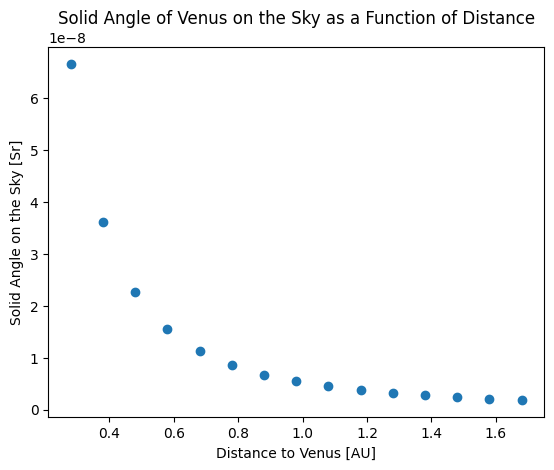

In [7]:
fig1 = plt.figure()
a1 = plt.subplot()
a1.scatter(distEtoV,vSA)
a1.set_title("Solid Angle of Venus on the Sky as a Function of Distance")
a1.set_xlabel("Distance to Venus [AU]")
a1.set_ylabel("Solid Angle on the Sky [Sr]")
plt.show()

# (b)

For part b I will be using the max() and min() function in python to get the maximum and minimum solid angles of Venus. I will then find the percent difference between the two values.

In [8]:
SAmax = max(vSA)
SAmin = min(vSA)

print("The percent difference between the minimum and maximum solid angle value is ",SAmin/SAmax * 100, "%")

The percent difference between the minimum and maximum solid angle value is  2.7777777777777795 %


To determine what fraction of the total sky each angle represents ill start with the fact that the full solid angle for a sphere is $4 \pi$. When we look at the sky we are at best getting half of the full solid angle of a sphere which is of course, $2 \pi$.

In [9]:
maxfrac = SAmax / (2 * np.pi)
minfrac = SAmin / (2 * np.pi)

print("The fraction of the sky that venus represents at its maximum distance from Earth is:",maxfrac)
print("The fraction of the sky that venus represents at its minimum distance from Earth is:",minfrac)

The fraction of the sky that venus represents at its maximum distance from Earth is: 1.0603528905485381e-08
The fraction of the sky that venus represents at its minimum distance from Earth is: 2.945424695968163e-10


# (c)

In lecture we found the equation for flux to be 
\begin{align}
F = \frac{L}{dA}
\end{align}
Which by integrating both sides with respect to dA:
\begin{align}
\begin{split}
\int{F}{dA} = \int{\frac{L}{dA}}{dA}
\\\\
F*{A} = L
\\\\
F = \frac{L}{A}
\\\\
F = \frac{L}{4 \pi d^2}
\end{split}
\end{align}

In [10]:
def vFlux(L,d):
    return(L / (4 * np.pi * d**2))

def vInt(L,d,sa):
    return(L / (4 * np.pi * d**2 * sa))

In [15]:
vLum = 5e23

maxFlux = vFlux(vLum,dFar)
minFlux = vFlux(vLum,dClose)
maxInt = vInt(vLum,dFar, SAmin)
minInt = vInt(vLum,dClose, SAmax)

print("The ratio of Venus' flux is:",minFlux/maxFlux)
print("The ratio of Venus' intensity is:",minInt/maxInt)

The ratio of Venus' flux is: 37.73469387755102
The ratio of Venus' intensity is: 1.0481859410430845


Question 2: In this problem, you will explore how we observe the Sun from
Earth and how we can use those properties to determine the physical properties of the Sun.

(a) If the Sun subtends a solid angle Ω on the sky and the flux from the Sun
just above the Earth’s atmosphere—integrated over all wavelengths— is f(d⊙), show that the flux at the solar photosphere is πf(d⊙)/Ω.

(b) The angular diameter of the Sun is $0.57\deg$. Calculate the solid angle subtended by the Sun in Steradians.

(c) The solar flux at Earth is $f(d⊙) = 1.4 × 10^6 erg s^{−1} cm^{−2}$. Use part (b)
and the Stefan-Boltzmann law, to derive the effective surface temperature of the Sun.

# 2(a)

To find an expression for the flux at the solar photosphere ($F_{⊙}$) we need 2 equations from our lecture:
\begin{align}
\Omega = \pi (\frac{R_{⊙}}{d_{⊙}})^2 \\
f(d_{⊙}) = \frac{L_{⊙}}{4\pi d_{⊙}^2}
\end{align}


To find $F_{⊙}$ we first find the luminosity at the photosphere:
\begin{align}
L_{⊙} = F_{⊙}  4\pi R_{⊙}^2
\end{align}

This expression can now be plugged into the expression for $f(d_{⊙})$:
\begin{align}
f(d_{⊙}) = \frac{F_{⊙}  \cancel{4\pi} R_{⊙}^2}{\cancel{4\pi} d_{⊙}^2}\\
f(d_{⊙}) = F_{⊙}  \frac{R_{⊙}^2}{d_{⊙}^2}
\end{align}

This equation can now be related to the solid angle equation through $\frac{R_{⊙}^2}{d_{⊙}^2}$:

\begin{align}
\frac{\Omega}{\pi} = (\frac{R_{⊙}}{d_{⊙}})^2 \\
f(d_{⊙}) = F_{⊙}  \frac{\Omega}{\pi}\\
\boxed{F_{⊙} = \frac{\pi f(d_{⊙})}{\Omega}}
\end{align}

# 2(b)

To find the solid angle subtended by the sun in Sr is found using the equation:
\begin{align}
\Omega = \pi (\frac{\alpha_{D,Sun}}{2})^2
\end{align}

where $\alpha_{D,Sun} = \frac{0.57\pi}{180\degree}$

\begin{align}
\Omega = \pi^3 (\frac{0.57^2}{4*180^2})\\
\boxed{\Omega \approx 7.7\times10^{-5} Sr}
\end{align}

# 2(c)

The Stefan-Boltzmann law states:

\begin{align}
F_{⊙} = \sigma T_{eff}^4
\end{align}

To get the effective temperature of the sun we just apply our answers from part a and b $(\Omega \approx 7.7\times 10^{-5} Sr)$ and the given value of $f(d_{⊙}) = 1.4 × 10^6 erg s^{−1} cm^{−2}$.

\begin{align}
\frac{\pi f(d_{⊙})}{\Omega} = \sigma T_{eff}^4\\
T_{eff} = \sqrt[4]{\frac{\pi f(d_{⊙})}{\Omega \sigma}}\\
\boxed{T_{eff} \approx 5633.79K}
\end{align}